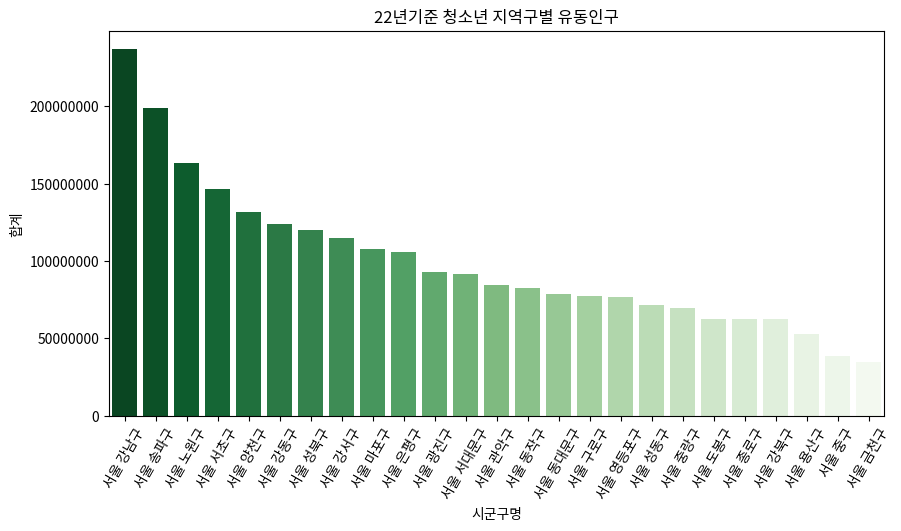

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
#%cd ../miniproject/datas/

# 시스템 폰트 경로 리스트
font_list = mpl.font_manager.findSystemFonts()
#print(font_list)
# 폰트 설정하기
prop = mpl.font_manager.FontProperties(fname='원하는 폰트 경로')
plt.rcParams['font.family'] = prop.get_family()

# Add every font at the specified location
font_dir = ['../../fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    mpl.font_manager.fontManager.addfont(font)
%matplotlib inline
mpl.rc("axes", unicode_minus=False)

# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'

#법정동 기준 시군구 단위 데이터 불러오기
data1 = pd.read_csv("법정동 기준 시군구 단위.csv")
#22년 자치구기준 생활인구 데이터 불러오기
data2 = pd.read_csv("LOCAL_PEOPLE_GU_2022.csv",encoding='CP949')
#법정동 기준 시군구 단위 데이터에서 '시군구명' 컬럼에서 서울이라는 문자열을 포함한 데이터만 추출
data1 = data1[data1["시군구명"].str.contains("서울")]
#법정동 기준 시군구 단위 데이터에서 문자열중 10세,15세를 포함하는 데이터만 추출하여 변수에 각각 저장
data3 = data2.filter(regex='10세')
data4 = data2.filter(regex='15세')
#위에서 추출한 데이터를 합침
data3 = pd.concat([data3,data4],axis=1)
#위에서 합친 데이터에 자치구기준 생활인구 데이터의 '시간대구분','자치구코드' 컬럼의 데이터 병합 및 저장
data3 = pd.concat([data3,data2["시간대구분"]],axis=1)
data3 = pd.concat([data3,data2["자치구코드"]],axis=1)
#합친 데이터를 '자치구코드' 컬럼 기준으로 오름차순정렬 후 저장
data3 = data3.sort_values(by=["자치구코드"])
#법정동 기준 시군구 단위 데이터를 '시군구_코드_법정동기준' 컬럼 기준으로 내림차순 재정렬 후 저장
data1 = data1.sort_values(by=["시군구_코드_법정동기준"])

#합친 데이터에 '시군구_코드_법정동기준' 컬럼과 동일한 값을 넣어주기위해 merge함수로 진행 및 저장
data5 = data3.merge(data1, how="left", left_on='자치구코드', right_on='시군구_코드_법정동기준')

#필요없는 컬럼 제거
data5= data5.drop(data5.columns[6],axis=1)
data5= data5.drop(data5.columns[7],axis=1)
#'시간대구분' 컬럼에서 8~22시 사이의 값만 추출 후 저장
country_list = [8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
data6 = data5[data5['시간대구분'].isin(country_list)]
#'시군구명' 유니크 데이터 추출 후 정렬
data7 = data6["시군구명"].unique()
data7 = np.sort(data7)
#빈 데이터프레임 생성
data8 = pd.DataFrame()
a=[]
b=[]
#빈 배열 생성
arr = np.array(b)
k=0
#시간대 별로 추출한 데이터에서 '시군구명'의 값과 시군구명 유니크 데이터 추출후 정렬한 데이터(길이 25)를 비교하여 값이 같을때만 
#전체데이터를 합친값을 나타내주는 series의 값을 순서대로 빈 배열에 25개씩 저장.
#빈 배열에 append로 추가
for i in range(4):
    line = []
    for j in range(25):
        line.append(data6[data6['시군구명'] == data7[j]].sum()[i])
    b.append(line)
#빈 데이터프레임에 새로운 컬럼명과 추출해서 데이터를 담아둔 배열중 [1]번과 [3]번에 있는 데이터를 값으로 넣어서 데이터 프레임 값 추가 후 
#데이터 타입 int로 변경
data8["15-19세 여자"] = b[1]
data8["15-19세 남자"] = b[3]
data8 = data8.astype(int)
#데이터프레임에 새로운 컬럼명과 기존에 위에서 정렬해두었던 '시군구명' 값을 넣어줌.
data8["시군구명"] = data7

#추출한 15~19세 청소년들의 데이터들의 합계를 구함
cc = data8['15-19세 여자'] + data8['15-19세 남자'] 
data8["합계"] = cc.values
#최종 데이터 합계 기준 내림차순 정렬 후 필요없는 0번쨰 컬럼 제거
data8 = data8.sort_values(by=['합계'])
data8 = data8.drop(data8.columns[0],axis=1)
data8

#데이터 bar그래프로 시각화
data8.to_csv("15~19세 22년 구별 생활인구.csv",encoding="CP949")
plt.figure(figsize=(10, 5))
plt.title("22년기준 청소년 지역구별 유동인구")
sns.barplot(x = data8.sort_values(by=["합계"],ascending=False)["시군구명"],y=data8["합계"].sort_values(ascending=False),palette="Greens_r")
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.xticks(rotation=60)
plt.show()
